In [1]:
import cv2
import numpy as np
from skimage.measure import label, regionprops
import os
# import parameters as params


# from components import *
from skimage import measure
import matplotlib.pyplot as plt

from fourier import *
from utility import *

def read_input(path):
    img = cv2.imread(path)
    img = img[:,:,0]
    print('img shape: ',img.shape)
    return img

def denoised(img):
    denoised_img = cv2.fastNlMeansDenoising(img,None,30,7,30)
#     cv2.imwrite(os.path.join(output_path, 'denoised.jpg'),denoised_img)
    return denoised_img

def binarized(img, threshold = -1):
    th, img_th = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    print(' OT threshold: ',th)
    #print('threshold using: ',th+10)
    th, img_th = cv2.threshold(img, th+10, 255 , cv2.THRESH_BINARY)
    #cv2.imwrite(os.path.join(output_path,'binarized.jpg'),img_th)
    #print('threshold using: ',th)
    return img_th, th

def pre_processing(path):
    img = read_input(path)
    img_denoised = denoised(img)
    img_bin, th = binarized(img_denoised)
    return img, img_denoised, img_bin, th

class shape_packet:
    packet_type = 0
    bbox = (0,0,0,0)
    blob_img = []
    centroid = []

    def __init__(self):
        self.horizontal_threshold = 20
        
    def set_centroid(self):
        total_rows, total_cols = self.blob_img.shape

        # Calculate the sum of x and y coordinates
        sum_x = 0
        sum_y = 0
        total_points = 0
    
        for row in range(total_rows):
            for col in range(total_cols):
                if self.blob_img[row][col]:
                    sum_y += col
                    sum_x += row
                    total_points += 1
    
        # Avoid division by zero
        if total_points == 0:
            return None, None
        
        self.centroid = (int(sum_x / total_points + self.bbox[0]), int(sum_y / total_points+self.bbox[1]))

    def __eq__(self, other):
        return self.centroid == other.centroid

    def __lt__(self, other):
        if abs(other.centroid[0] - self.centroid[0]) <= self.horizontal_threshold:
            if self.centroid[1] - other.centroid[1] < 0 :
                return True
            else :
                return False
        elif other.centroid[0] - self.centroid[0] > self.horizontal_threshold:
            return True
        elif self.centroid[0] - other.centroid[0] > self.horizontal_threshold:
            return False


class window_partial_cells:
    def __init__(self):
        self.type_1_pkts = []
        self.type_2_pkts = []
        self.type_3_pkts = []
        self.type_4_pkts = []
        self.type_5_pkts = []
        self.type_6_pkts = []
        self.type_7_pkts = []
        self.type_8_pkts = []
   
    type_1_pkts = []
    type_2_pkts = []
    type_3_pkts = []
    type_4_pkts = []
    type_5_pkts = []
    type_6_pkts = []
    type_7_pkts = []
    type_8_pkts = []
    
def connected_components(img):
    lbl = label(img)
    blobs = regionprops(lbl)
    return blobs
def my_preprocessing(img):
    img_denoised = denoised(img)
    img_bin, th = binarized(img_denoised)
    return img_bin

In [2]:
# import os
# print('Number of CPUs in the system: {}'.format(os.cpu_count()))

In [3]:
layout_name = "26.png"  # Replace with your image path

layout_path = os.path.join( os.getcwd(), 'images', layout_name)
layout = read_input(layout_path)

im_row_length, im_col_length = layout.shape
num_window_row = 2
num_window_col = 3
win_row_length = int(im_row_length/num_window_row)
win_col_length = int(im_col_length/num_window_col)

total_windows = num_window_row*num_window_col

print(win_row_length, win_col_length)

img shape:  (490, 1080)
245 360


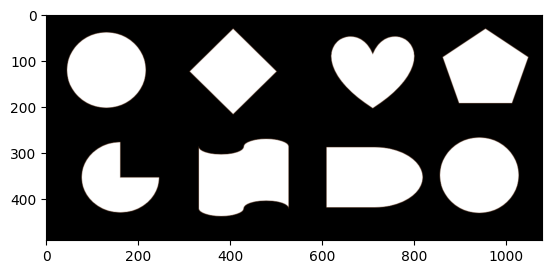

TypeError: Image data of dtype object cannot be converted to float

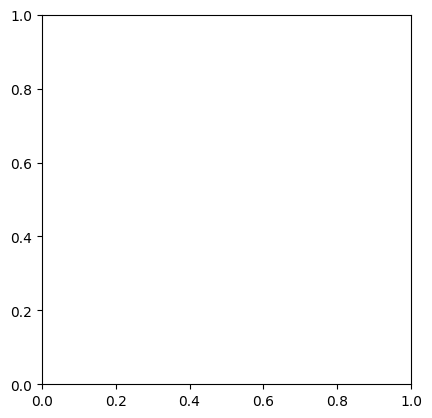

In [6]:
# Windowing
window_partial_cells_container = []
Windows = []
shape_pkts = []

for win_row_index in range(0,num_window_row):
    for win_col_index in range(0,num_window_col):
        # current_window = layout[win_row_index*win_row_length: (win_row_index+1)*win_row_length
        #                             ,win_col_index*win_col_length: (win_col_index+1)*win_col_length]
        start_row = win_row_index * win_row_length
        end_row = min((win_row_index + 1) * win_row_length, im_row_length)
        start_col = win_col_index * win_col_length
        end_col = min((win_col_index + 1) * win_col_length, im_col_length)

        with open(layout_path, 'rb') as f:
            f.seek(start_row * end_col * 3 + start_col * 3)  # Assuming 3 channels (BGR)
            bytes = f.read((end_row - start_row) * (end_col - start_col) * 3)
            img_np = np.frombuffer(bytes, dtype=np.uint8)
            current_window = cv2.imdecode(img_np, cv2.IMREAD_COLOR)
            # print(img)
        # current_window = layout[start_row:end_row, start_col:end_col]
        
        plt.imshow(current_window)
        plt.show()
        # img_bin = my_preprocessing(current_window)
        # plt.imshow(img_bin, cmap = 'gray')
        # plt.show()
        # # perform prepcossing
        # # layout, layout_denoised, layout_bin, th = pre_processing(layout_path)
        # blobs_layout = connected_components(img_bin)
        
        # partial_cells = window_partial_cells()
        # i = 0
        # for blob in blobs_layout:
            
        #     i = i+1
        #     # print(i)
        #     blob_img = blob.image
        #     # print(blob_img)
        #     # plt.imshow(blob_img,cmap = 'gray')
        #     # plt.show()
        #     (min_row, min_col, max_row, max_col) = blob.bbox
        #     # print(blob.bbox)
            
        #     pkt = shape_packet()
            
        #     pkt.bbox = (min_row+start_row, min_col+start_col, max_row+start_row, max_col+start_col) # we preserve coordinates 
        #     pkt.blob_img = blob_img
        #     # store centroid of shape coordinate in coordinate of original image
        #     # print(start_row,start_col)
        #     pkt.centroid = ( int( blob.centroid[0]+start_row), int(blob.centroid[1]+start_col)) # centroid from skii_image is wrt window image coordinates
        #     # print(pkt.centroid)
        #     # print(blob_img.shape)
            
        #     if ( min_row == 0 ) and ( min_col == 0):
        #         pkt.packet_type = 1
        #         partial_cells.type_1_pkts.append(pkt)
        #         # print("found type",pkt.packet_type)
        #     elif ( min_row == 0 ) and ( max_col == win_col_length):
        #         pkt.packet_type = 3
        #         partial_cells.type_3_pkts.append(pkt)
        #         # print("found type",pkt.packet_type)
        #     elif ( max_row == win_row_length ) and ( max_col == win_col_length):
        #         pkt.packet_type = 5
        #         partial_cells.type_5_pkts.append(pkt)
        #         # print("found type",pkt.packet_type)
        #     elif ( max_row == win_row_length ) and ( min_col == 0):
        #         pkt.packet_type = 7
        #         partial_cells.type_7_pkts.append(pkt)
        #         # print("found type",pkt.packet_type)
        #     elif ( min_row == 0 ) :
        #         pkt.packet_type = 2
        #         partial_cells.type_2_pkts.append(pkt)
        #         # print("found type",pkt.packet_type)
        #     elif ( max_col == win_col_length ) :
        #         pkt.packet_type = 4
        #         partial_cells.type_4_pkts.append(pkt)
        #         # # print("found type",pkt.packet_type)
        #     elif ( max_row == win_row_length ) :
        #         pkt.packet_type = 6
        #         partial_cells.type_6_pkts.append(pkt)
        #         # print("found type",pkt.packet_type)
        #     elif ( min_col == 0 ) :
        #         pkt.packet_type = 8
        #         partial_cells.type_8_pkts.append(pkt)
        #         # print("found type",pkt.packet_type)
        #     else:
        #         shape_pkts.append(pkt)
        #         # print("found type",pkt.packet_type)
                
        # window_partial_cells_container.append(partial_cells)


In [21]:
# Cell merging for type 4 and type 8

for window_index in range(total_windows-1):
    p1 = window_partial_cells_container[window_index]
    p2 = window_partial_cells_container[window_index+1]

    #merge type 4 and 8
    for type_4_pkt in p1.type_4_pkts:
        type_4_img = type_4_pkt.blob_img
        # print(type_4_img)
        type_4_img_rows, type_4_img_cols = type_4_img.shape
        type_4_right_edge_min_row = float('inf')
        type_4_right_edge_max_row = float('-inf')
        # get the min & max row values of the pixels touching the right edge of the image
        for row_index in range(type_4_img_rows):
            if type_4_img[row_index][-1]:  # Check the last column of each row
                type_4_right_edge_max_row = max(type_4_right_edge_max_row, row_index)
                type_4_right_edge_min_row = min(type_4_right_edge_min_row, row_index)
        
        # print(" type4 org coordinate",type_4_right_edge_min_row,type_4_right_edge_max_row)
        # plt.imshow(type_4_img)
        # # print(type_4_img)
        # plt.show()
        # print(type_4_pkt.bbox)
                
        # Shift to original coordinates
                
        type_4_bbox_min_row, type_4_bbox_min_col, type_4_bbox_max_row, type_4_bbox_max_col = type_4_pkt.bbox
        type_4_right_edge_min_row = type_4_right_edge_min_row + type_4_bbox_min_row
        type_4_right_edge_max_row = type_4_right_edge_max_row + type_4_bbox_min_row

        # print(" type4 shifted coordinate",type_4_right_edge_min_row, type_4_right_edge_max_row)
        
        for type_8_pkt in p2.type_8_pkts[:]:
            type_8_img = type_8_pkt.blob_img
            type_8_img_rows, type_8_img_cols = type_8_img.shape

            # plt.imshow(type_8_img)
            # plt.show()
            
            type_8_left_edge_min_row = float('inf')
            type_8_left_edge_max_row = float('-inf')
            # get the min & max row values of the pixels touching the right edge of the image
            for row_index in range(type_8_img_rows):
                if type_8_img[row_index][0]:  # Check the first column of each row
                    type_8_left_edge_max_row = max(type_8_left_edge_max_row, row_index)
                    type_8_left_edge_min_row = min(type_8_left_edge_min_row, row_index)
            
            # print("type 8 org",type_8_left_edge_min_row, type_8_left_edge_max_row)
            # Shift to original coordinates
            type_8_bbox_min_row, type_8_bbox_min_col , type_8_bbox_max_row, type_8_bbox_max_col = type_8_pkt.bbox
            type_8_left_edge_min_row = type_8_left_edge_min_row + type_8_bbox_min_row
            type_8_left_edge_max_row = type_8_left_edge_max_row + type_8_bbox_min_row

            # print("type8 shifted",type_8_left_edge_min_row, type_8_left_edge_max_row)

            #Check merging condition
            if (np.abs(type_4_right_edge_min_row - type_8_left_edge_min_row) <= 3) and (np.abs(type_4_right_edge_max_row - type_8_left_edge_max_row) <= 3):
                
                print("match found")

                # merge packets
                merged_pkt =  shape_packet()

                # new bounding box
                merged_bbox_min_row = min( type_4_bbox_min_row, type_8_bbox_min_row)
                merged_bbox_max_row = max( type_4_bbox_max_row, type_8_bbox_max_row)
                merged_bbox_min_col = type_4_bbox_min_col
                merged_bbox_max_col = type_8_bbox_max_col

                merged_pkt.bbox = (merged_bbox_min_row,merged_bbox_min_col,merged_bbox_max_row,merged_bbox_max_col)

                #new merged image
                merged_image = np.zeros((merged_bbox_max_row-merged_bbox_min_row, merged_bbox_max_col-merged_bbox_min_col), dtype=bool)

                row_diff = type_4_bbox_min_row - type_8_bbox_min_row
                if ( row_diff > 0 ):
                    merged_image[ row_diff: row_diff+ type_4_img_rows, : type_4_img_cols] = type_4_img
                    merged_image[ : type_8_img_rows, type_4_img_cols: ] = type_8_img
                else:
                    merged_image[ : type_4_img_rows, : type_4_img_cols ] = type_4_img
                    merged_image[ np.abs(row_diff): np.abs(row_diff)+ type_8_img_rows,  type_4_img_cols: ] = type_8_img

                merged_pkt.blob_img = merged_image
                merged_pkt.set_centroid()
                shape_pkts.append(merged_pkt)
                
                # plt.imshow(merged_image)
                # plt.show()
                
                p2.type_8_pkts.remove(type_8_pkt)
                
                break


match found
match found
match found
match found


In [22]:
# packet sorting

# shape_pkts_sorted = sorted(shape_pkts, key=lambda obj: (obj.centroid[0], obj.centroid[1]))

shape_pkts_sorted = sorted(shape_pkts)

In [8]:
# packet validation

for pkt in shape_pkts_sorted:
    # contour = detect_contour(filled_image)
    img = pkt.blob_img.astype(np.uint8) * 255 
    contour, _ = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    gx,gy = sample_polygon_uniformly(contour[0],50)
    contour_sampled = np.column_stack((gx, gy)).astype(np.int32)
    # print(contour_sampled)
#     cv2.drawContours(contour_image, [contour], 0, (255), thickness=1)
    # f_descriptors_layout = fourier_descriptors(contour_sampled)
    # canvas = np.zeros(img.shape)
    # cv2.drawContours(canvas, [contour_sampled], 0, (255), thickness=1)
    # plt.imshow(canvas, cmap='gray')
    # plt.show()
    f_descriptors = fourier_descriptors(contour_sampled)

    

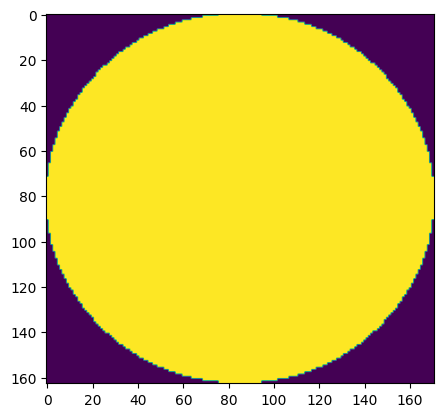

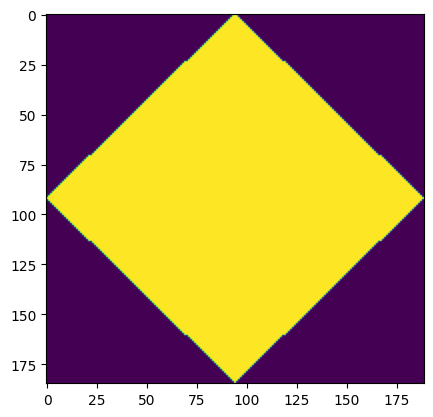

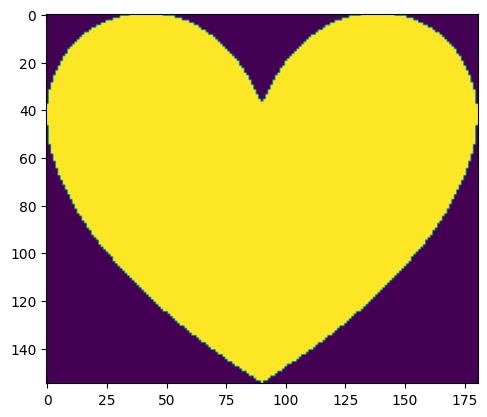

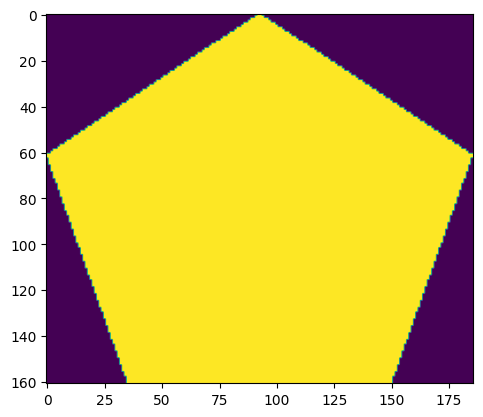

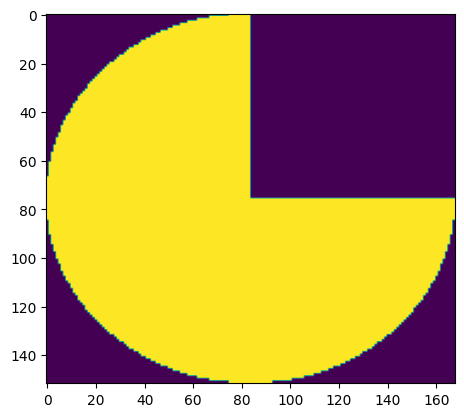

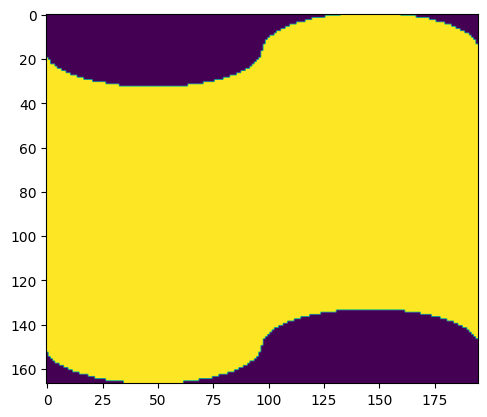

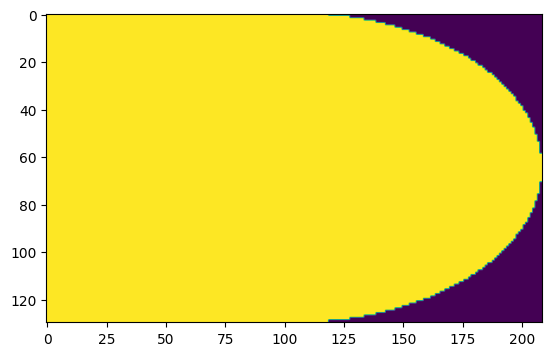

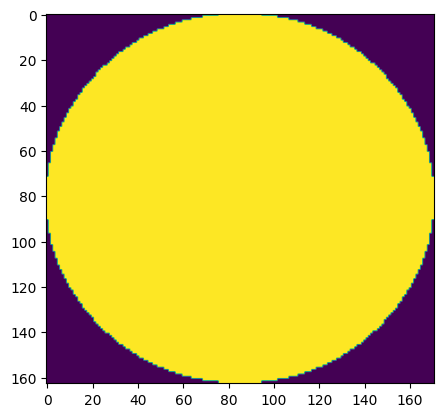

In [23]:
for pkt in shape_pkts_sorted:
    plt.imshow(pkt.blob_img)
    plt.show()
    # print(pkt.centroid)
    

In [77]:
print(len(window_partial_cells_container))
print(len(shape_pkts))

6
4


In [78]:
partial_cells = window_partial_cells_container[1]

In [79]:
print(len(partial_cells.type_7_pkts))

0


In [34]:
for type_8_pkt in partial_cells.type_8_pkts:
    type_8_img = type_8_pkt.blob_img
    type_8_img_rows,_ = type_8_img.shape
    plt.imshow(type_8_img)
    plt.show()

In [80]:
for pkt in shape_pkts:
    # plt.imshow(pkt.blob_img)
    # plt.show()
    print(pkt.centroid)
    # print(pkt.bbox)
    # (min_row, min_col, max_row, max_col) = pkt.bbox
    # print(pkt.blob_img.shape)
    # print(max_row-min_row, max_col-min_col)


(118, 337)
(113, 709)
(349, 340)
(349, 690)


In [ ]:



shape_pkts = []

## window starts
layout_path = "1.png"  # Replace with your image path
layout, layout_denoised, layout_bin, th = pre_processing(layout_path)
blobs_layout = connected_components(layout_bin)

win_row, win_col = layout_bin.shape
print(win_row, win_col)

type_1_pkts = []
type_2_pkts = []
type_3_pkts = []
type_4_pkts = []
type_5_pkts = []
type_6_pkts = []
type_7_pkts = []
type_8_pkts = []

for blob in blobs_layout:
    img = blob.image
    # plt.imshow(img)
    # plt.show()
    (min_row, min_col, max_row, max_col) = blob.bbox
    pkt = shape_packet()

    # define class id
    
    if (max_col == win_col):
        pkt.packet_type = 1

    # copy other properties

    shape_pkts.append(pkt)




    # pkt.packet_type = 2
    # print(pkt.packet_type)
    